In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.sparse import hstack
warnings.filterwarnings('ignore')
data_var = pd.read_csv('training_variants')

In [143]:
data_var.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [144]:
data_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [145]:
data_var.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [146]:
data_var.shape

(3321, 4)

In [147]:
data_text= pd.read_csv('training_text',sep="\|\|",names=["ID","TEXT"],skiprows=1)

In [148]:
data_text.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [149]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
TEXT    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [150]:
data_text.shape

(3321, 2)

In [151]:
data_var['Class'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [152]:
import nltk 
#nltk.download('stopwords')

In [153]:
#selecting stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [154]:
import re #for string manipulation
def datatext_preprocessing(text, index, column):
    # Removing int values from text data
    if type(text) is not int:
        string=""
        #all special characters replaced by space
        text = re.sub('[^a-zA-Z0-9\n]', ' ', str(text))
        #multiple spaces replaced by single space
        text = re.sub('\s+',' ', str(text))
        text = text.lower()
        
        for word in text.split():
        # if the word is a not a stop word then retain that word from text
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string    

In [155]:
for index, dat in data_text.iterrows():
    if type(dat['TEXT']) is str:
        datatext_preprocessing(dat['TEXT'], index, 'TEXT')

In [156]:
data= pd.merge(data_var, data_text, on='ID', how='left')
data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [157]:
data[data.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [158]:
data = data.dropna(axis=0, subset=['TEXT'])

In [159]:
data[data.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT


In [160]:
data.shape

(3316, 5)

In [161]:
yy = data['Class'].values
data.Gene      = data.Gene.str.replace('\s+', '_')
data.Variation = data.Variation.str.replace('\s+', '_')

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, yy, stratify=yy, test_size=0.2)

In [163]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2)

In [164]:
print(y_train.shape[0])
print(y_test.shape[0])
print(y_cv.shape[0])

2121
664
531


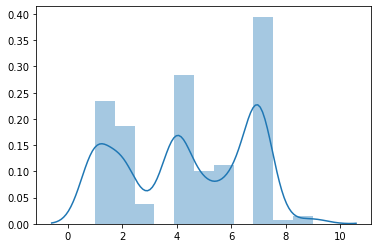

In [165]:
sns.distplot(y_train)

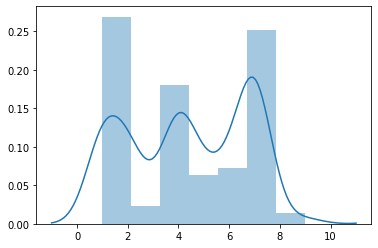

In [166]:
sns.distplot(y_test)

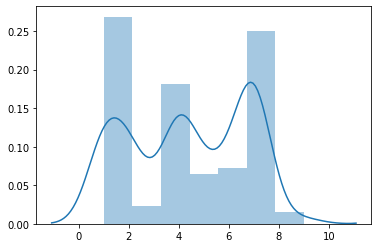

In [167]:
sns.distplot(y_cv)

In [168]:
m_test = y_test.shape[0]
m_cv = y_cv.shape[0]

In [169]:
#finding log loss on CV(cross validation) data using random model
from sklearn.metrics.classification import log_loss
y_cv_p = np.zeros((m_cv,9))
for i in range(m_cv):
    randprob = np.random.rand(1,9)
    y_cv_p[i] = ((randprob/sum(sum(randprob)))[0])
log_loss(y_cv,y_cv_p)

2.4591092367318796

In [170]:
#finding log loss on test data using random model
y_test_p = np.zeros((m_test,9))
for i in range(m_test):
    randprob = np.random.rand(1,9)
    y_test_p[i] = ((randprob/sum(sum(randprob)))[0])
log_loss(y_test,y_test_p)

2.4363500277097914

In [171]:
#getting index of maximum probability
predicted_y_test =np.argmax(y_test_p, axis=1)
predicted_y_test

array([8, 2, 7, 4, 2, 6, 0, 5, 1, 8, 1, 7, 5, 7, 4, 2, 5, 5, 7, 7, 7, 5,
       2, 7, 1, 1, 6, 7, 5, 5, 3, 3, 7, 3, 0, 6, 5, 1, 6, 7, 4, 1, 2, 2,
       6, 0, 0, 0, 7, 7, 0, 3, 6, 3, 1, 4, 8, 3, 0, 7, 6, 7, 3, 5, 5, 1,
       5, 3, 4, 5, 1, 3, 6, 4, 2, 7, 6, 6, 0, 7, 1, 4, 6, 7, 8, 5, 5, 4,
       0, 1, 3, 1, 1, 5, 0, 1, 7, 3, 2, 5, 6, 3, 1, 8, 5, 0, 7, 2, 3, 3,
       0, 2, 0, 6, 6, 3, 4, 0, 7, 5, 4, 4, 3, 7, 6, 4, 3, 2, 6, 5, 2, 8,
       5, 5, 0, 6, 7, 6, 2, 2, 7, 4, 3, 7, 0, 3, 2, 5, 8, 8, 6, 5, 2, 5,
       3, 7, 7, 8, 6, 5, 2, 1, 8, 8, 6, 8, 0, 4, 5, 2, 1, 1, 7, 6, 2, 1,
       6, 4, 8, 3, 1, 1, 5, 3, 3, 8, 8, 5, 2, 7, 7, 2, 4, 3, 4, 7, 1, 8,
       2, 6, 3, 4, 0, 6, 3, 5, 2, 0, 0, 0, 4, 0, 7, 8, 0, 2, 0, 7, 5, 4,
       4, 4, 0, 2, 7, 6, 4, 4, 0, 7, 5, 5, 6, 7, 3, 0, 4, 7, 1, 8, 7, 7,
       2, 5, 2, 5, 4, 3, 1, 5, 0, 1, 7, 3, 0, 0, 5, 0, 5, 8, 0, 1, 3, 6,
       3, 3, 8, 1, 1, 2, 4, 8, 7, 3, 8, 7, 4, 1, 6, 8, 3, 6, 2, 8, 1, 0,
       8, 7, 1, 1, 3, 8, 0, 3, 6, 3, 8, 5, 8, 3, 7,

In [172]:
predicted_y_test+=1  #since index values lies in range (0,8)

In [173]:
#Now we'll check importance of feature 'Gene'
x_train['Gene'].value_counts()

BRCA1     170
TP53      103
EGFR       89
BRCA2      87
PTEN       79
         ... 
FGF3        1
KDM5A       1
EIF1AX      1
DNMT3B      1
ASXL2       1
Name: Gene, Length: 236, dtype: int64

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
# one-hot encoding of categorical feature 'Gene'
vectorize_gene = CountVectorizer()
train_gene_onehot = vectorize_gene.fit_transform(x_train['Gene'])
test_gene_onehot = vectorize_gene.transform(x_test['Gene'])
cv_gene_onehot = vectorize_gene.transform(x_cv['Gene'])

In [175]:
train_gene_onehot.shape

(2121, 235)

In [176]:
train_gene_onehot

<2121x235 sparse matrix of type '<class 'numpy.int64'>'
	with 2121 stored elements in Compressed Sparse Row format>

In [177]:
#functions for extracting fetures for mean encoding of 'Gene' and 'Variation' columns
def GV_feature_dict(alpha, feature, x):
    value_counts = x_train[feature].value_counts()
    GV_dict = dict()
    for i, denom in value_counts.items():
        vect = []
        for k in range(1,10):
            class_count = x_train.loc[(x_train['Class']==k) & (x_train[feature]==i)]
            vect.append((class_count.shape[0] + alpha*10)/ (denom + 90*alpha))
        GV_dict[i]=vect
    return GV_dict

def GV_feature(alpha, feature, x):
    GV_dict = GV_feature_dict(alpha, feature, x)
    value_counts = x_train[feature].value_counts()
    GV_feature = []
    for index, row in x.iterrows():
        if row[feature] in dict(value_counts).keys():
            GV_feature.append(GV_dict[row[feature]])
        else:
            GV_feature.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    return GV_feature

In [178]:
alpha = 1
train_gene_meanEnc= np.array(GV_feature(alpha, "Gene", x_train))
test_gene_meanEnc= np.array(GV_feature(alpha, "Gene", x_test))
cv_gene_meanEnc= np.array(GV_feature(alpha, "Gene", x_cv))

In [179]:
train_gene_meanEnc.shape

(2121, 9)

In [180]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** x for x in range(-5, 1)]
CV_log_error=[]
for k in alpha:
    classifier = SGDClassifier(alpha=k, penalty='l2', loss='log', random_state=35)
    classifier.fit(train_gene_onehot, y_train)
    sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(train_gene_onehot, y_train)
    predicted_y = sigmoid_classifier.predict_proba(cv_gene_onehot)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.2313357320666658
If alpha =  0.0001  ,log loss =  1.192510004198182
If alpha =  0.001  ,log loss =  1.2317811993247731
If alpha =  0.01  ,log loss =  1.3476347229271821
If alpha =  0.1  ,log loss =  1.4508675529087391
If alpha =  1  ,log loss =  1.4885915764525808


In [181]:
classifier = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', random_state=35)
classifier.fit(train_gene_onehot, y_train)
sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(train_gene_onehot, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=35,
                                                    shuffle=True, tol=0.001,
                                          

In [182]:
predicted_y = sigmoid_classifier.predict_proba(train_gene_onehot)
train_log_loss = log_loss(y_train, predicted_y, labels=classifier.classes_)
print("train_log_loss = ", train_log_loss)
predicted_y = sigmoid_classifier.predict_proba(cv_gene_onehot)
cv_log_loss = log_loss(y_cv, predicted_y, labels=classifier.classes_)
print("cv_log_loss = ", cv_log_loss)
predicted_y = sigmoid_classifier.predict_proba(test_gene_onehot)
test_log_loss = log_loss(y_test, predicted_y, labels=classifier.classes_)
print("test_log_loss = ", test_log_loss)

train_log_loss =  0.9936765070031539
cv_log_loss =  1.192510004198182
test_log_loss =  1.2099310489682447


In [183]:
#let's check for good overlap
test_overlap=x_test[x_test['Gene'].isin(list(set(x_train['Gene'])))].shape[0]
print(test_overlap)
cv_overlap=x_cv[x_cv['Gene'].isin(list(set(x_train['Gene'])))].shape[0]
print(cv_overlap)

651
515


In [184]:
#let's check importance of feature 'Variation'
x_train['Variation'].value_counts()

Truncating_Mutations    61
Deletion                48
Amplification           46
Fusions                 25
Q61R                     3
                        ..
R505C                    1
Y406H                    1
E1935G                   1
L1460P                   1
E40K                     1
Name: Variation, Length: 1923, dtype: int64

In [185]:
# one-hot encoding of categorical feature 'Gene'
vectorize_variation = CountVectorizer()
train_variation_onehot = vectorize_variation.fit_transform(x_train['Variation'])
test_variation_onehot = vectorize_variation.transform(x_test['Variation'])
cv_variation_onehot = vectorize_variation.transform(x_cv['Variation'])

In [186]:
train_variation_onehot.shape

(2121, 1957)

In [187]:
alpha = 1
train_variation_meanEnc= np.array(GV_feature(alpha, "Variation", x_train))
test_variation_meanEnc= np.array(GV_feature(alpha, "Variation", x_test))
cv_variation_meanEnc= np.array(GV_feature(alpha, "Variation", x_cv))

In [188]:
train_variation_meanEnc.shape

(2121, 9)

In [189]:
alpha = [10 ** x for x in range(-5, 1)]
CV_log_error=[]
for k in alpha:
    classifier = SGDClassifier(alpha=k, penalty='l2', loss='log', random_state=35)
    classifier.fit(train_variation_onehot, y_train)
    sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(train_variation_onehot, y_train)
    predicted_y = sigmoid_classifier.predict_proba(cv_variation_onehot)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.694416317506062
If alpha =  0.0001  ,log loss =  1.687766546706746
If alpha =  0.001  ,log loss =  1.6890827471905427
If alpha =  0.01  ,log loss =  1.6973516400833664
If alpha =  0.1  ,log loss =  1.7090298335413732
If alpha =  1  ,log loss =  1.7097150179538292


In [190]:
classifier = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', random_state=35)
classifier.fit(train_variation_onehot, y_train)
sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(train_variation_onehot, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=35,
                                                    shuffle=True, tol=0.001,
                                          

In [191]:
predicted_y = sigmoid_classifier.predict_proba(train_variation_onehot)
train_log_loss = log_loss(y_train, predicted_y, labels=classifier.classes_)
print("train_log_loss = ", train_log_loss)
predicted_y = sigmoid_classifier.predict_proba(cv_variation_onehot)
cv_log_loss = log_loss(y_cv, predicted_y, labels=classifier.classes_)
print("cv_log_loss = ", cv_log_loss)
predicted_y = sigmoid_classifier.predict_proba(test_variation_onehot)
test_log_loss = log_loss(y_test, predicted_y, labels=classifier.classes_)
print("test_log_loss = ", test_log_loss)

train_log_loss =  0.7789536890464089
cv_log_loss =  1.687766546706746
test_log_loss =  1.7319686028725119


In [192]:
#let's check for good overlap
test_overlap=x_test[x_test['Variation'].isin(list(set(x_train['Variation'])))].shape[0]
print(test_overlap)
cv_overlap=x_cv[x_cv['Variation'].isin(list(set(x_train['Variation'])))].shape[0]
print(cv_overlap)

64
57


In [193]:
#let's process 'Text' column
vectorize_text = CountVectorizer(min_df=4)
train_text_onehot = vectorize_text.fit_transform(x_train['TEXT'])
train_text_features= vectorize_text.get_feature_names()    #getting all the words
train_text_f_counts = train_text_onehot.sum(axis=0).A1     #getting frequency of occurrence of each word
text_dict = dict(zip(list(train_text_features),train_text_f_counts))


print("No. of unique words in train data :", len(train_text_features))

No. of unique words in train data : 44680


In [194]:
from collections import defaultdict
#function to get count of each word
def extract_dictionary(text):
    dictionary = defaultdict(int)
    for index, row in text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [195]:
word_dict = []
for i in range(1,10):
    class_text = x_train[x_train['Class']==i]
    # building a word dictionary based on the words in that class
    word_dict.append(extract_dictionary(class_text))

total_word_dict = extract_dictionary(x_train)

dummy_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((word_dict[j][i]+10 )/(total_word_dict[i]+90))
    dummy_array.append(ratios)
dummy_array = np.array(dummy_array)

In [196]:
import math
def text_meanEnc(x):
    text_meanEnc = np.zeros((x.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in x.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((word_dict[i].get(word,0)+10 )/(total_word_dict.get(word,0)+90)))
            text_meanEnc[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_meanEnc

In [197]:
train_text_meanEnc= text_meanEnc(x_train)
test_text_meanEnc= text_meanEnc(x_test)
cv_text_meanEnc= text_meanEnc(x_cv)

In [198]:
#normalizing each row
train_text_meanEnc = (train_text_meanEnc.T/train_text_meanEnc.sum(axis=1)).T
test_text_meanEnc = (test_text_meanEnc.T/test_text_meanEnc.sum(axis=1)).T
cv_text_meanEnc = (cv_text_meanEnc.T/cv_text_meanEnc.sum(axis=1)).T

In [199]:
from sklearn.preprocessing import normalize
train_text_onehot = normalize(train_text_onehot, axis=0)
test_text_onehot = vectorize_text.transform(x_test['TEXT'])
test_text_onehot = normalize(test_text_onehot, axis=0)
cv_text_onehot = vectorize_text.transform(x_cv['TEXT'])
cv_text_onehot = normalize(cv_text_onehot, axis=0)

In [200]:
from collections import Counter
sorted_text_dict = dict(sorted(text_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occurrence = np.array(list(sorted_text_dict.values()))
print(Counter(sorted_text_occurrence))

Counter({4: 2878, 5: 2435, 8: 2076, 7: 1991, 6: 1871, 10: 1608, 11: 1300, 9: 1273, 12: 1097, 16: 834, 15: 779, 14: 777, 13: 717, 18: 655, 17: 646, 20: 626, 19: 603, 21: 553, 22: 483, 23: 454, 24: 439, 28: 433, 25: 359, 26: 349, 27: 319, 30: 314, 31: 309, 52: 306, 50: 279, 29: 277, 32: 261, 33: 260, 35: 252, 36: 246, 40: 235, 42: 224, 34: 224, 38: 214, 41: 190, 37: 190, 44: 176, 46: 175, 39: 159, 43: 155, 53: 152, 55: 151, 56: 149, 48: 148, 49: 145, 60: 144, 47: 140, 51: 139, 45: 139, 57: 135, 69: 131, 54: 121, 63: 120, 62: 115, 66: 109, 82: 106, 70: 104, 61: 104, 64: 103, 77: 101, 65: 98, 59: 97, 72: 92, 58: 90, 67: 85, 76: 83, 68: 83, 74: 82, 84: 80, 75: 80, 80: 79, 78: 79, 88: 78, 73: 78, 81: 77, 79: 75, 71: 75, 100: 74, 86: 74, 83: 70, 89: 69, 90: 68, 85: 66, 93: 63, 96: 60, 107: 58, 106: 58, 102: 58, 94: 58, 87: 58, 95: 57, 92: 57, 111: 54, 97: 54, 91: 54, 101: 53, 123: 52, 99: 52, 132: 50, 124: 50, 110: 49, 108: 48, 98: 48, 112: 47, 122: 46, 116: 46, 104: 46, 138: 44, 109: 44, 134

In [201]:
alpha = [10 ** x for x in range(-5, 1)]
CV_log_error=[]
for k in alpha:
    classifier = SGDClassifier(alpha=k, penalty='l2', loss='log', random_state=35)
    classifier.fit(train_text_onehot, y_train)
    sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(train_text_onehot, y_train)
    predicted_y = sigmoid_classifier.predict_proba(cv_text_onehot)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.333676990429888
If alpha =  0.0001  ,log loss =  1.2525746485476137
If alpha =  0.001  ,log loss =  1.215877942476146
If alpha =  0.01  ,log loss =  1.288462974809631
If alpha =  0.1  ,log loss =  1.4770495183774661
If alpha =  1  ,log loss =  1.6515169494657127


In [202]:
classifier = SGDClassifier(alpha=0.001, penalty='l2', loss='log', random_state=35)
classifier.fit(train_text_onehot, y_train)
sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(train_text_onehot, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=35,
                                                    shuffle=True, tol=0.001,
                                           

In [203]:
predicted_y = sigmoid_classifier.predict_proba(train_text_onehot)
train_log_loss = log_loss(y_train, predicted_y, labels=classifier.classes_)
print("train_log_loss = ", train_log_loss)
predicted_y = sigmoid_classifier.predict_proba(cv_text_onehot)
cv_log_loss = log_loss(y_cv, predicted_y, labels=classifier.classes_)
print("cv_log_loss = ", cv_log_loss)
predicted_y = sigmoid_classifier.predict_proba(test_text_onehot)
test_log_loss = log_loss(y_test, predicted_y, labels=classifier.classes_)
print("test_log_loss = ", test_log_loss)

train_log_loss =  0.7231211715073393
cv_log_loss =  1.215877942476146
test_log_loss =  1.133466442151281


In [232]:
train_text_onehot.shape

(2121, 44680)

In [205]:
def get_text_overlap(x):
    vectorized_text = CountVectorizer(min_df=4)
    x_text = vectorized_text.fit_transform(x['TEXT'])
    x_text_features = vectorized_text.get_feature_names()

    x_text_f_counts = x_text.sum(axis=0).A1
    x_text_dict = dict(zip(list(x_text_features),x_text_f_counts))
    l1 = len(set(x_text_features))
    l2 = len(set(train_text_features) & set(x_text_features))
    return l1,l2

In [206]:
#checking for good overlap
l1,l2 = get_text_overlap(x_test)
print(l1,l2)
l1,l2 = get_text_overlap(x_cv)
print(l1,l2)

22467 22105
20479 20308


In [207]:
#Let's process data
temp1=hstack((train_gene_onehot,train_variation_onehot))
temp2=hstack((test_gene_onehot,test_variation_onehot))
temp3=hstack((cv_gene_onehot,cv_variation_onehot))

x_train_onehot=hstack((train_text_onehot,temp1))
x_test_onehot=hstack((test_text_onehot,temp2))
x_cv_onehot=hstack((cv_text_onehot,temp3))

In [208]:
y_train=np.array(list(x_train['Class']))
y_cv=np.array(list(x_cv['Class']))
y_test=np.array(list(x_test['Class']))

In [209]:
temp4=np.hstack((train_gene_meanEnc,train_variation_meanEnc))
temp5=np.hstack((test_gene_meanEnc,test_variation_meanEnc))
temp6=np.hstack((cv_gene_meanEnc,cv_variation_meanEnc))

x_train_meanEnc=np.hstack((train_text_meanEnc,temp4))
x_test_meanEnc=np.hstack((test_text_meanEnc,temp5))
x_cv_meanEnc=np.hstack((cv_text_meanEnc,temp6))

In [210]:
x_train_onehot.shape

(2121, 46872)

In [211]:
x_train_meanEnc.shape

(2121, 27)

In [247]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_predict):
    C = confusion_matrix(y_test, y_predict)
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0)) 
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(22,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(22,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(22,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [212]:
#developing model::Naive Bayes
from sklearn.naive_bayes import MultinomialNB
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
for k in alpha:
    classifier=MultinomialNB(alpha=k)
    classifier.fit(x_train_onehot,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_onehot,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.307934132146491
If alpha =  0.0001  ,log loss =  1.3075766529730062
If alpha =  0.001  ,log loss =  1.3089747756607384
If alpha =  0.1  ,log loss =  1.2819797556730657
If alpha =  1  ,log loss =  1.278986900611932
If alpha =  10  ,log loss =  1.3898160024172128
If alpha =  100  ,log loss =  1.4017054267966942
If alpha =  1000  ,log loss =  1.3448390478877201


train_log_loss =  0.9043339775067495
cv_log_loss =  1.2706460766142917
test_log_loss =  1.2679292475605433
-------------------- Confusion matrix --------------------


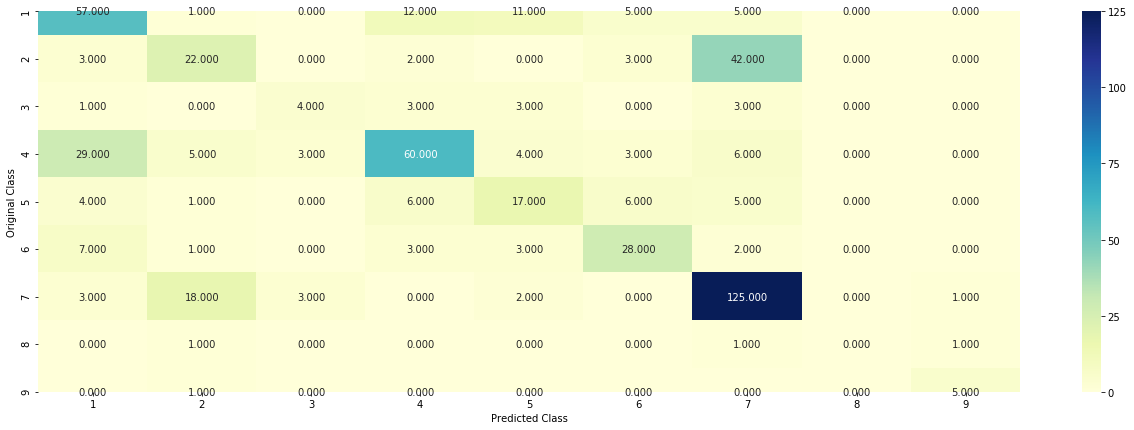

-------------------- Precision matrix (Columm Sum=1) --------------------


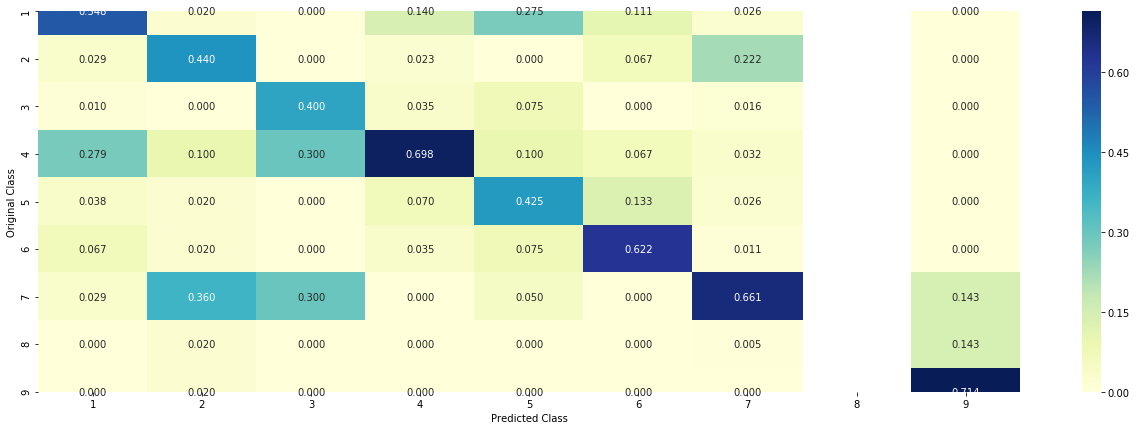

-------------------- Recall matrix (Row sum=1) --------------------


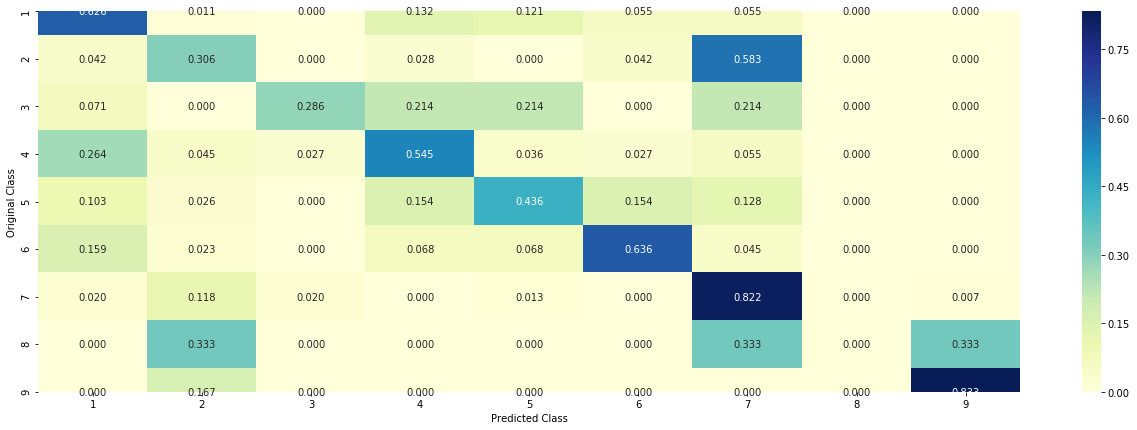

In [248]:
classifier=MultinomialNB(alpha=0.3)
classifier.fit(x_train_onehot, y_train)
sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_onehot, y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_onehot)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_onehot)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_onehot.toarray()))

In [233]:
#developing model::Naive Bayes
from sklearn.naive_bayes import MultinomialNB
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
for k in alpha:
    classifier=MultinomialNB(alpha=k)
    classifier.fit(x_train_meanEnc,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_meanEnc,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.2348871425835566
If alpha =  0.0001  ,log loss =  1.2348848046964214
If alpha =  0.001  ,log loss =  1.234861470646867
If alpha =  0.1  ,log loss =  1.2326357905221106
If alpha =  1  ,log loss =  1.2295447207308192
If alpha =  10  ,log loss =  1.2671095216940835
If alpha =  100  ,log loss =  1.274248889565489
If alpha =  1000  ,log loss =  1.2739816483097095


train_log_loss =  1.1728365799462956
cv_log_loss =  1.2255608745928404
test_log_loss =  1.2752024389071013
-------------------- Confusion matrix --------------------


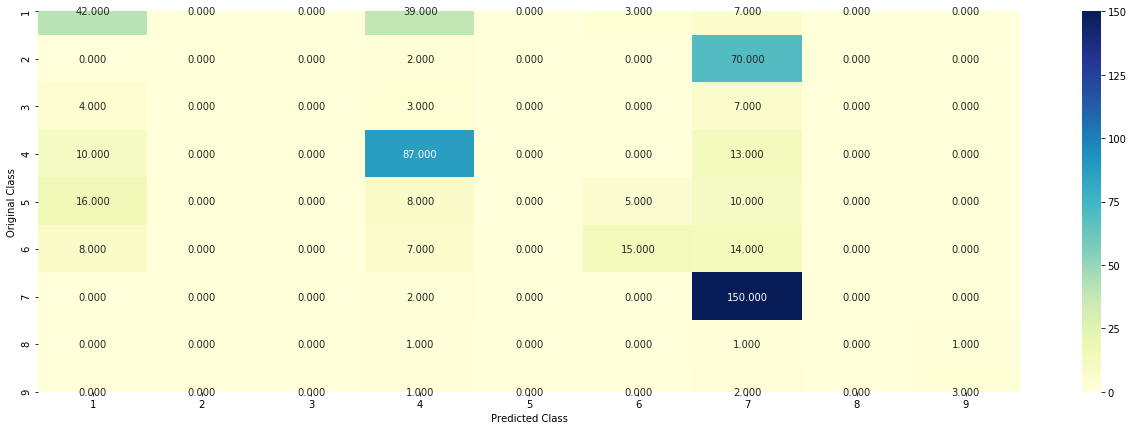

-------------------- Precision matrix (Columm Sum=1) --------------------


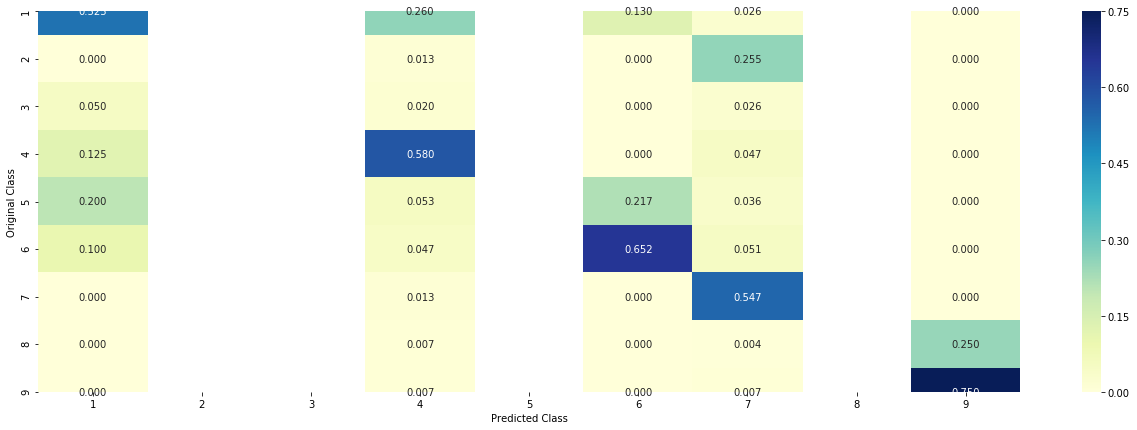

-------------------- Recall matrix (Row sum=1) --------------------


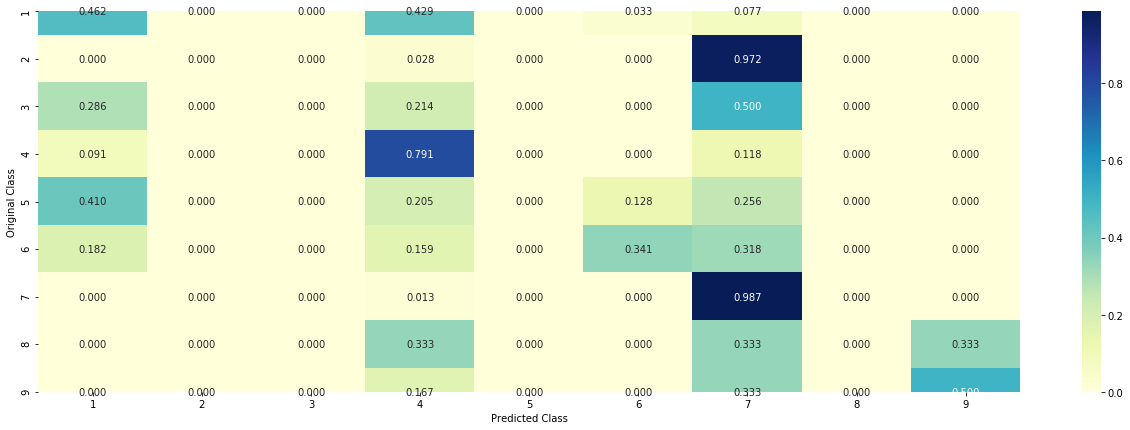

In [251]:
classifier=MultinomialNB(alpha=0.6)
classifier.fit(x_train_meanEnc, y_train)
sigmoid_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_meanEnc, y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_meanEnc)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_meanEnc)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_meanEnc))

In [214]:
#developing model::K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 10, 15, 20, 25, 30, 40, 50, 100]
for k in alpha:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_meanEnc,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_meanEnc,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  5  ,log loss =  1.0334654575916946
If alpha =  10  ,log loss =  1.0098737702862057
If alpha =  15  ,log loss =  1.025414594328835
If alpha =  20  ,log loss =  1.0356922506843496
If alpha =  25  ,log loss =  1.0428576431568186
If alpha =  30  ,log loss =  1.0492874026187335
If alpha =  40  ,log loss =  1.059526405725696
If alpha =  50  ,log loss =  1.065403780467124
If alpha =  100  ,log loss =  1.08117374890379


train_log_loss =  0.6418035941951633
cv_log_loss =  1.007174648148706
test_log_loss =  1.10124324082937
-------------------- Confusion matrix --------------------


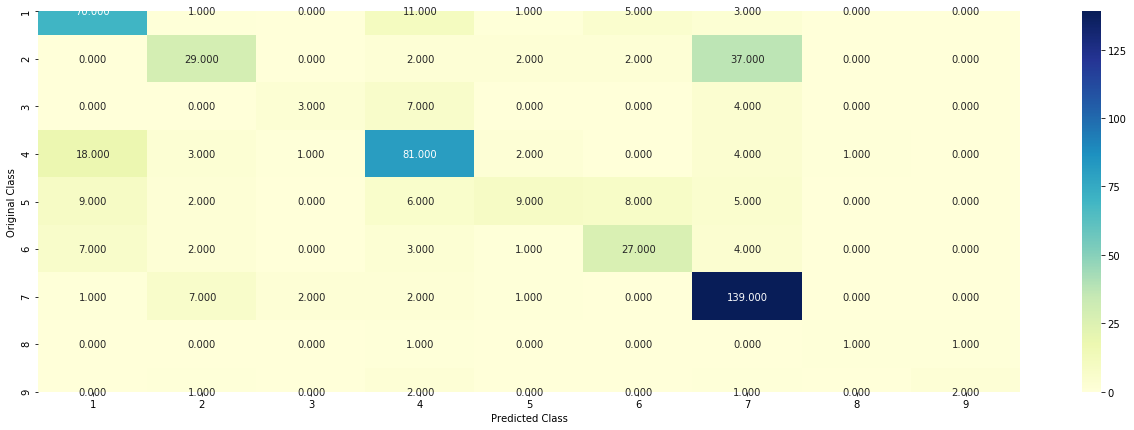

-------------------- Precision matrix (Columm Sum=1) --------------------


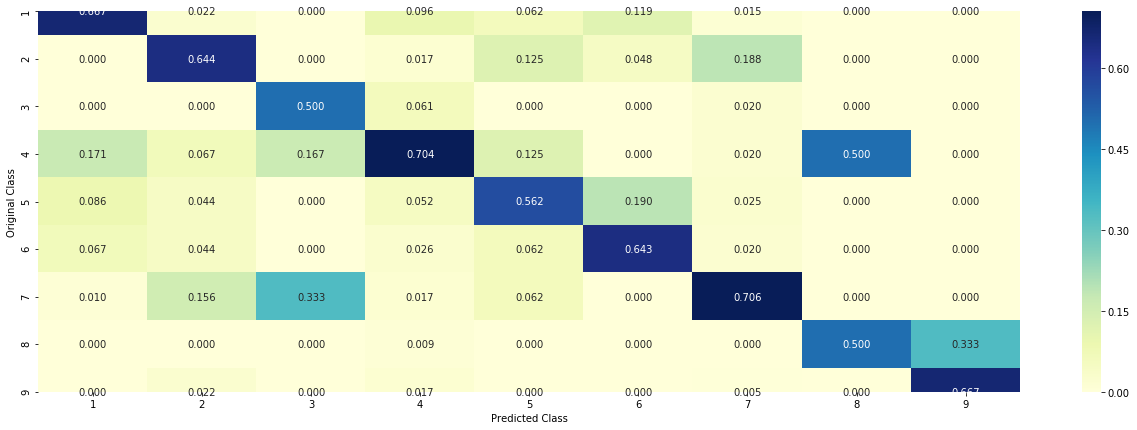

-------------------- Recall matrix (Row sum=1) --------------------


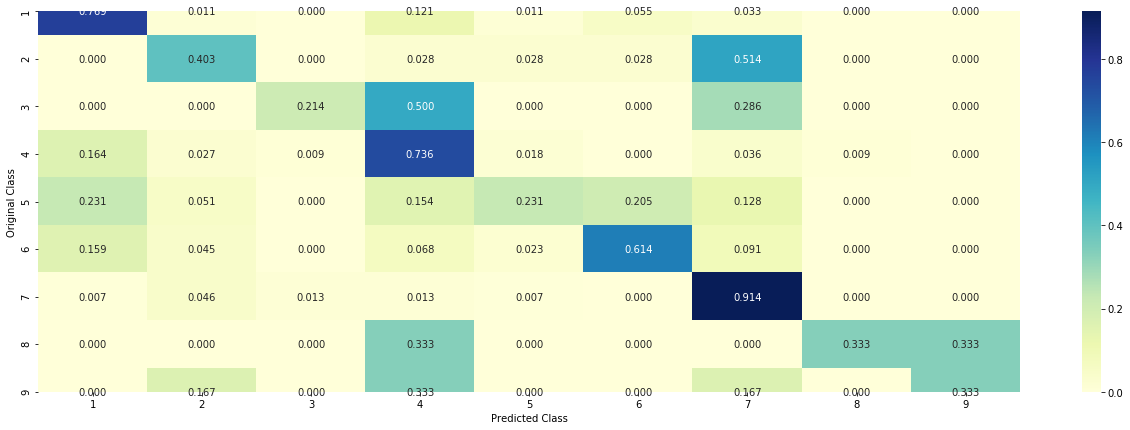

In [252]:
classifier=KNeighborsClassifier(n_neighbors=11)
classifier.fit(x_train_meanEnc,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_meanEnc,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_meanEnc)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_meanEnc)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_meanEnc))

In [216]:
#Logistic Regression
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 2)]
for k in alpha:
    classifier=SGDClassifier(class_weight='balanced', alpha=k, penalty='l2', loss='log', random_state=36)
    classifier.fit(x_train_onehot,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_onehot,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.3234190475366405
If alpha =  0.0001  ,log loss =  1.1698388777410844
If alpha =  0.001  ,log loss =  1.1301761008238949
If alpha =  0.01  ,log loss =  1.152250206973975
If alpha =  0.1  ,log loss =  1.486882394264282
If alpha =  1  ,log loss =  1.7099478222293072
If alpha =  10  ,log loss =  1.737130748610295


train_log_loss =  0.5729030479420201
cv_log_loss =  1.1301761008238949
test_log_loss =  1.0791129612179449
-------------------- Confusion matrix --------------------


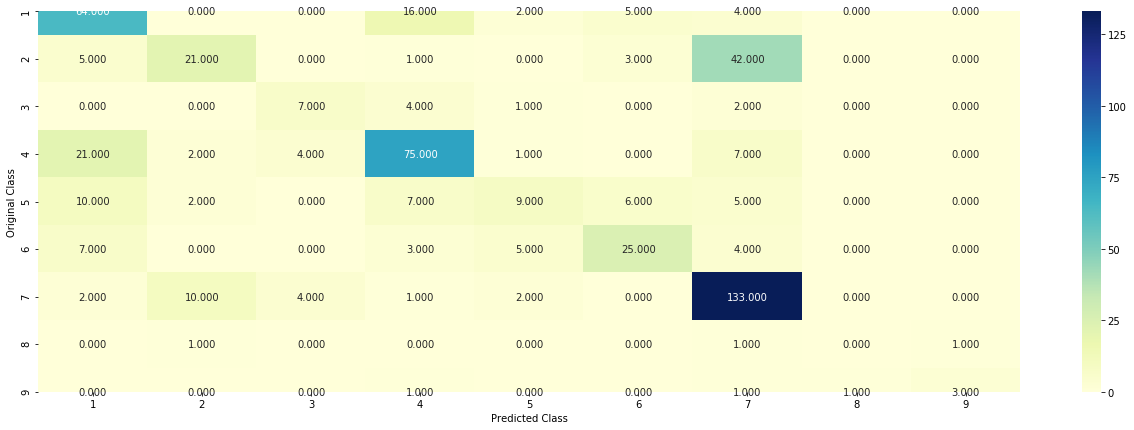

-------------------- Precision matrix (Columm Sum=1) --------------------


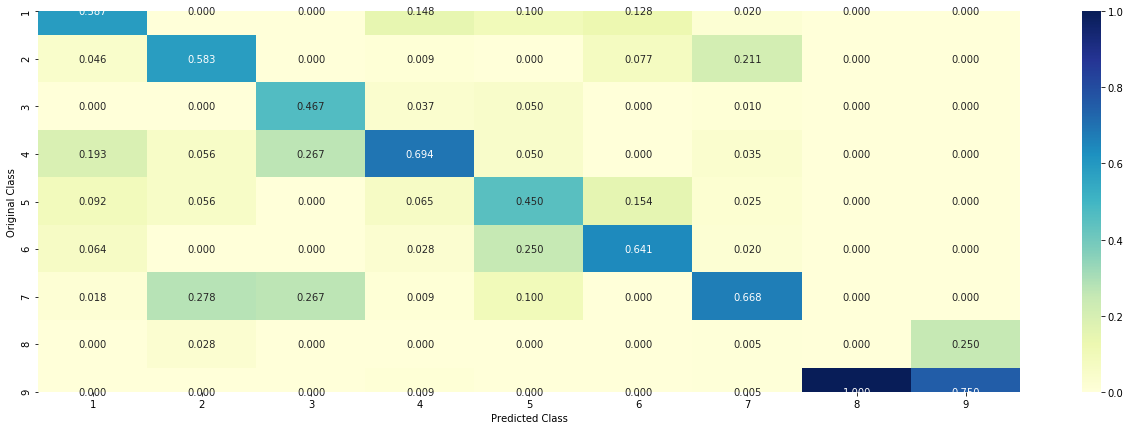

-------------------- Recall matrix (Row sum=1) --------------------


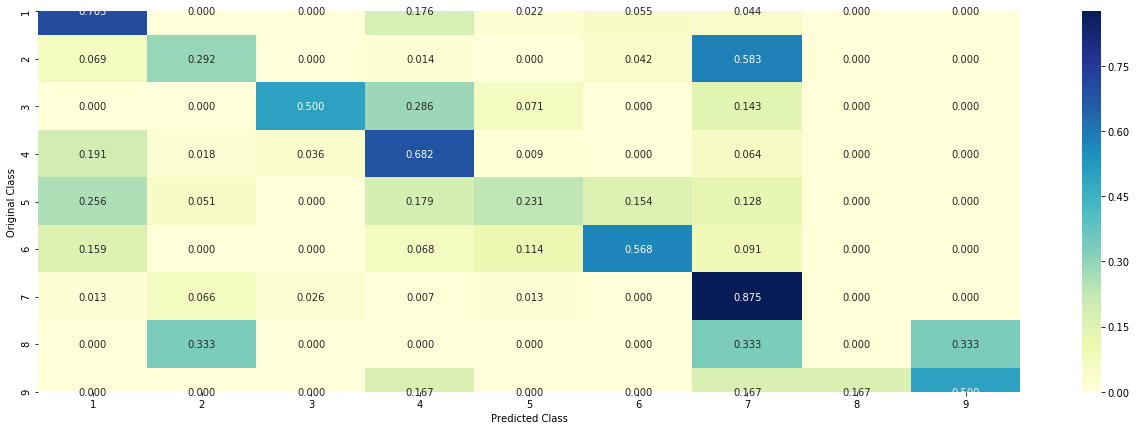

In [253]:
classifier=SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='log', random_state=36)
classifier.fit(x_train_onehot,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_onehot,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_onehot)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_onehot)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_onehot.toarray()))

In [218]:
#Logistic Regression
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 2)]
for k in alpha:
    classifier=SGDClassifier(alpha=k, penalty='l2', loss='log', random_state=36)
    classifier.fit(x_train_onehot,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_onehot,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.3247685174757133
If alpha =  0.0001  ,log loss =  1.1881118120763865
If alpha =  0.001  ,log loss =  1.153906302047169
If alpha =  0.01  ,log loss =  1.2171854439148122
If alpha =  0.1  ,log loss =  1.3932268401569545
If alpha =  1  ,log loss =  1.5936784981900283
If alpha =  10  ,log loss =  1.63488614894979


train_log_loss =  0.5817027456643611
cv_log_loss =  1.153906302047169
test_log_loss =  1.096006060009595
-------------------- Confusion matrix --------------------


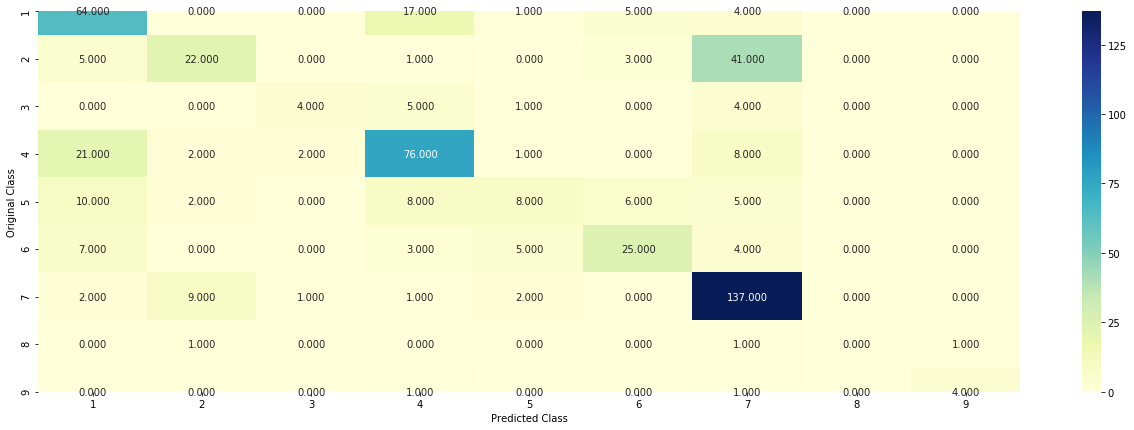

-------------------- Precision matrix (Columm Sum=1) --------------------


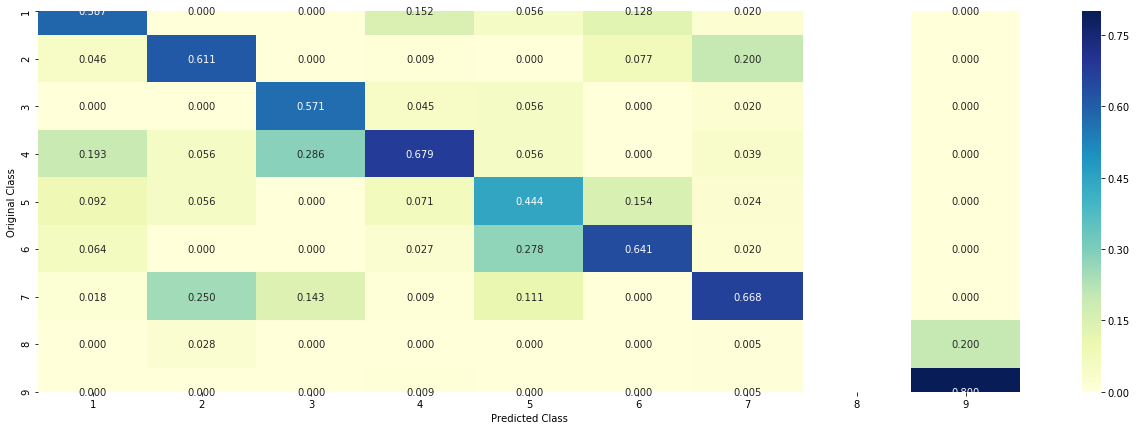

-------------------- Recall matrix (Row sum=1) --------------------


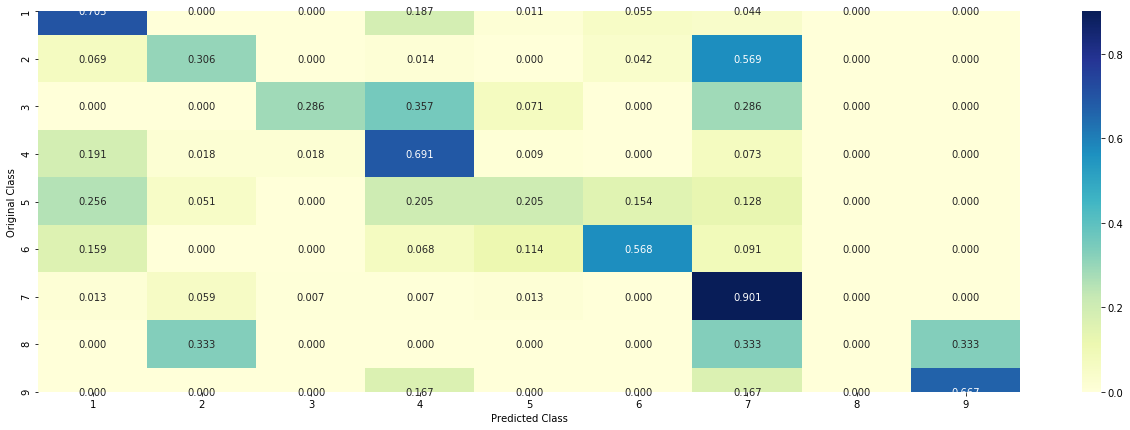

In [254]:
classifier=SGDClassifier(alpha=0.001, penalty='l2', loss='log', random_state=36)
classifier.fit(x_train_onehot,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_onehot,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_onehot)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_onehot)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_onehot.toarray()))

In [220]:
#Logistic Regression
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 2)]
for k in alpha:
    classifier=SGDClassifier(class_weight='balanced', alpha=k, penalty='l2', loss='log', random_state=36)
    classifier.fit(x_train_meanEnc,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_meanEnc,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.0341637946874778
If alpha =  0.0001  ,log loss =  1.0582368598447294
If alpha =  0.001  ,log loss =  1.1616161173348774
If alpha =  0.01  ,log loss =  1.233936987514903
If alpha =  0.1  ,log loss =  1.2480118871002863
If alpha =  1  ,log loss =  1.2832194604815994
If alpha =  10  ,log loss =  1.51627456581953


train_log_loss =  0.8772879723039434
cv_log_loss =  1.0582368598447294
test_log_loss =  1.1164927455352156
-------------------- Confusion matrix --------------------


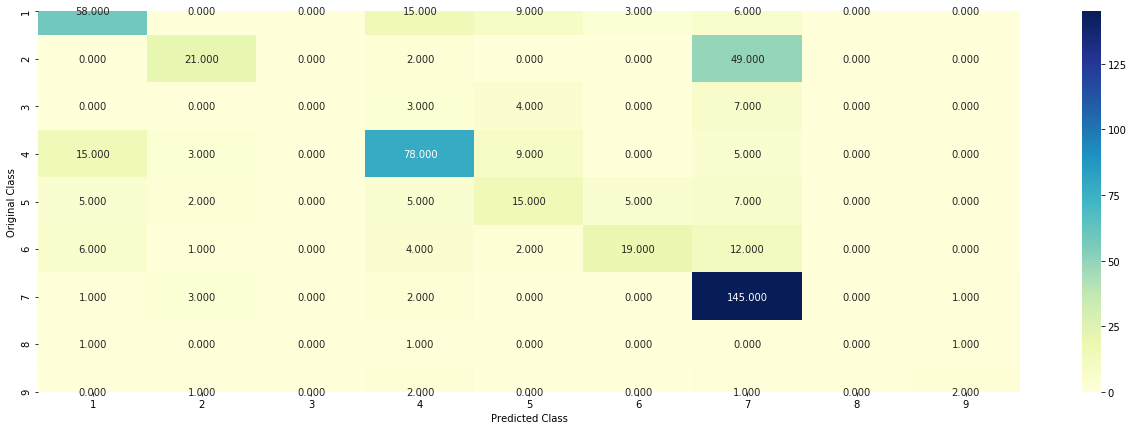

-------------------- Precision matrix (Columm Sum=1) --------------------


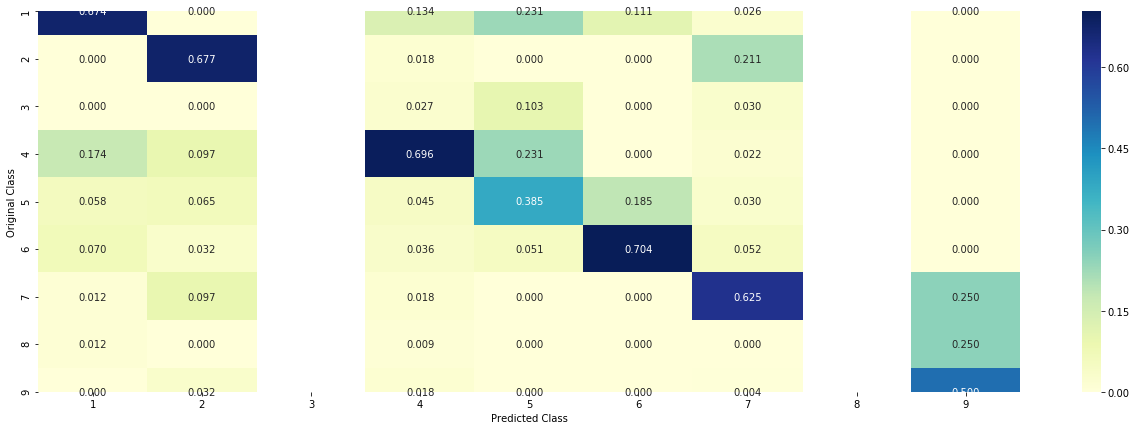

-------------------- Recall matrix (Row sum=1) --------------------


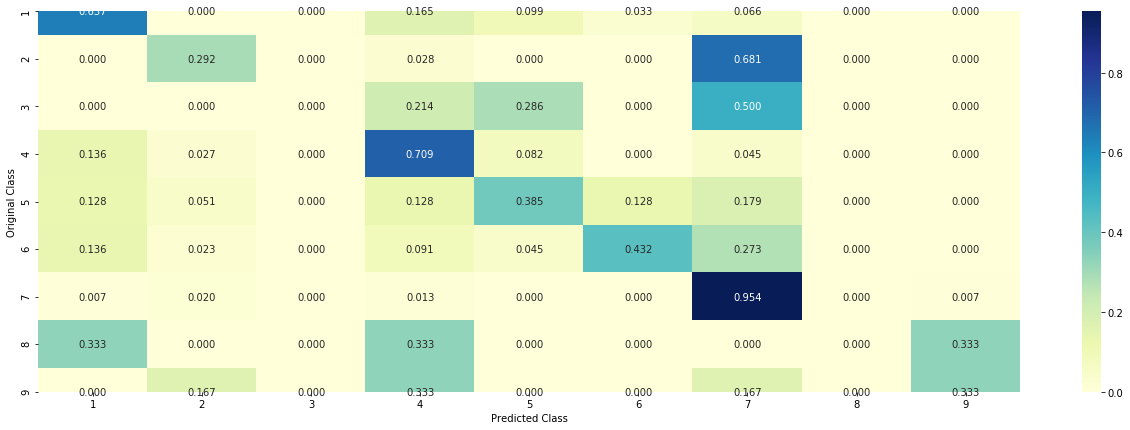

In [255]:
classifier=SGDClassifier(class_weight='balanced', alpha=0.0001, penalty='l2', loss='log', random_state=36)
classifier.fit(x_train_meanEnc,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_meanEnc,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_meanEnc)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_meanEnc)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_meanEnc))

In [222]:
#Logistic Regression
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-6, 2)]
for k in alpha:
    classifier=SGDClassifier(alpha=k, penalty='l2', loss='log', random_state=36)
    classifier.fit(x_train_meanEnc,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_meanEnc,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-06  ,log loss =  1.1506190548798299
If alpha =  1e-05  ,log loss =  1.040589627383999
If alpha =  0.0001  ,log loss =  1.0692548558319515
If alpha =  0.001  ,log loss =  1.163473415966956
If alpha =  0.01  ,log loss =  1.2303030119190486
If alpha =  0.1  ,log loss =  1.270496418321061
If alpha =  1  ,log loss =  1.2789781525077075
If alpha =  10  ,log loss =  1.4295252776092946


train_log_loss =  0.6153809129525019
cv_log_loss =  1.040589627383999
test_log_loss =  1.0951801958883318
-------------------- Confusion matrix --------------------


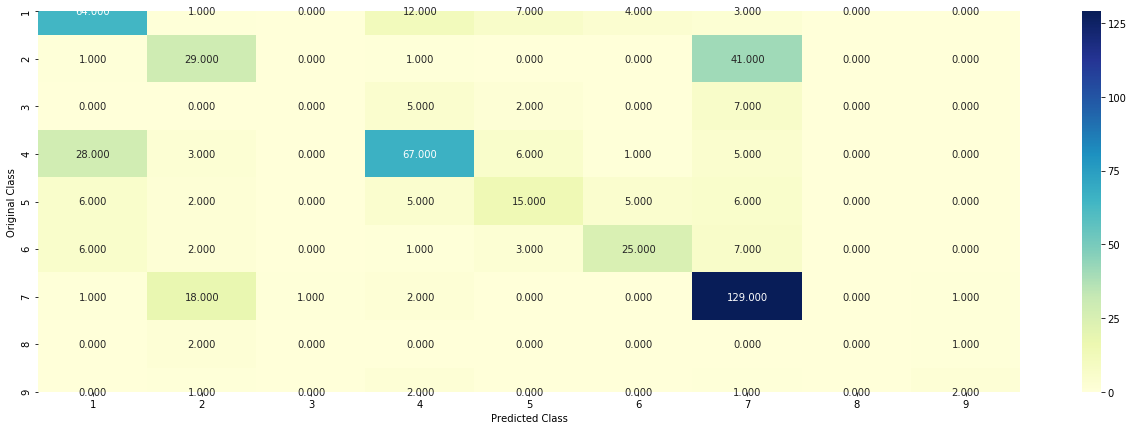

-------------------- Precision matrix (Columm Sum=1) --------------------


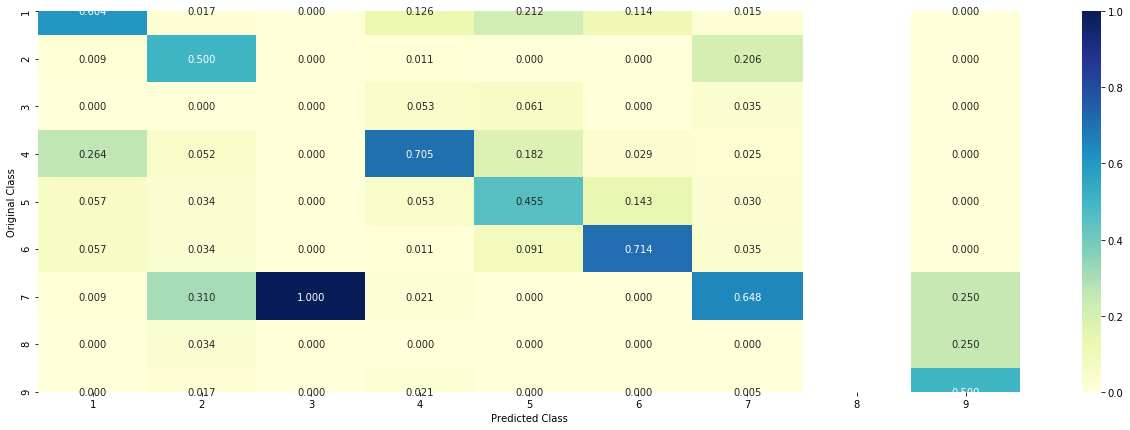

-------------------- Recall matrix (Row sum=1) --------------------


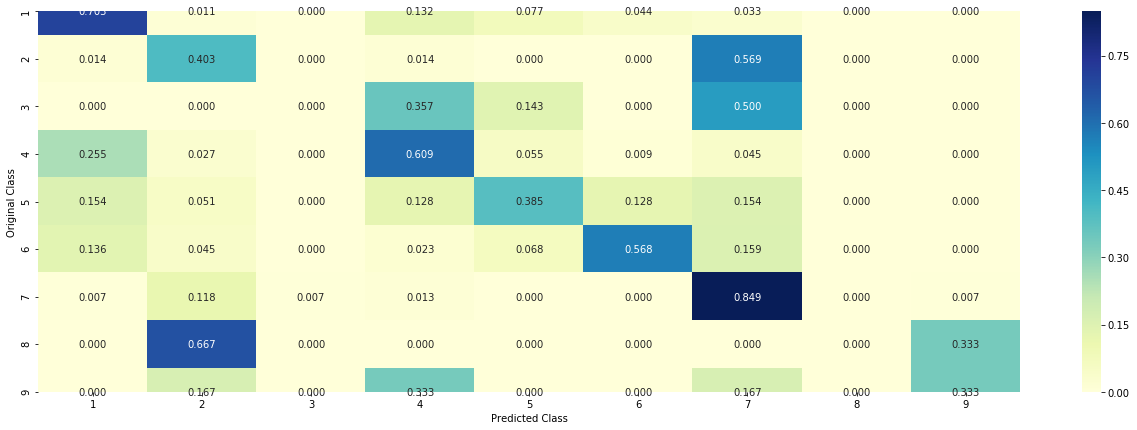

In [256]:
classifier=SGDClassifier(alpha=1e-05, penalty='l2', loss='log', random_state=36)
classifier.fit(x_train_meanEnc,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_meanEnc,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_meanEnc)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_meanEnc)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_meanEnc))

In [224]:
#Linear SVM
alpha = [10 ** x for x in range(-4, 2)]
for k in alpha:
    classifier=SGDClassifier( class_weight='balanced', alpha=k, penalty='l2', loss='hinge', random_state=36)
    classifier.fit(x_train_onehot,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_onehot,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  0.0001  ,log loss =  1.283803329283319
If alpha =  0.001  ,log loss =  1.1644460991492303
If alpha =  0.01  ,log loss =  1.1556512990509356
If alpha =  0.1  ,log loss =  1.41336220904681
If alpha =  1  ,log loss =  1.7302681706625904
If alpha =  10  ,log loss =  1.7404141047592503


train_log_loss =  0.5862418486406248
cv_log_loss =  1.1644460991492303
test_log_loss =  1.1390024946219088
-------------------- Confusion matrix --------------------


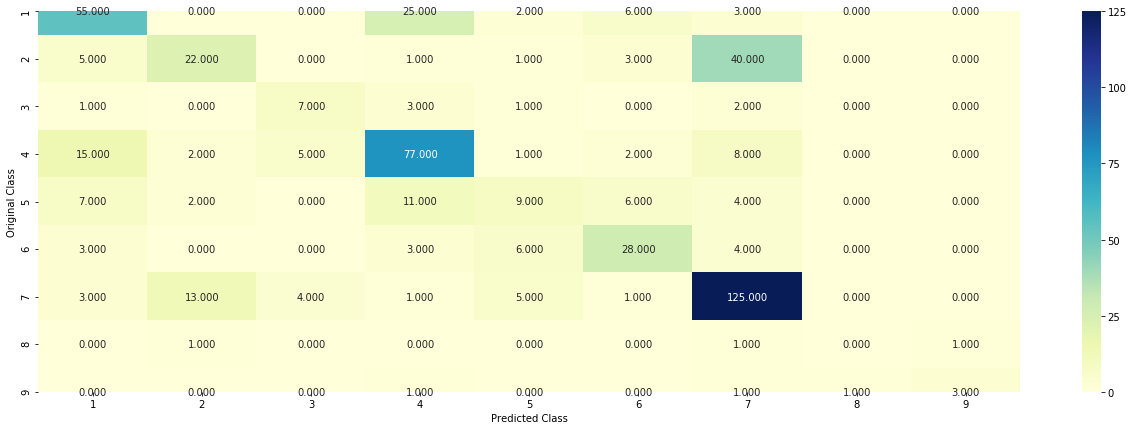

-------------------- Precision matrix (Columm Sum=1) --------------------


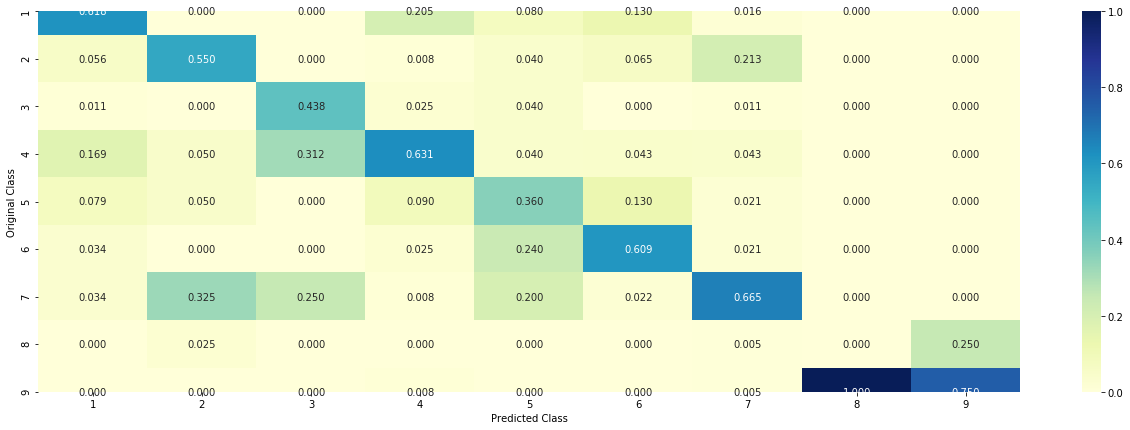

-------------------- Recall matrix (Row sum=1) --------------------


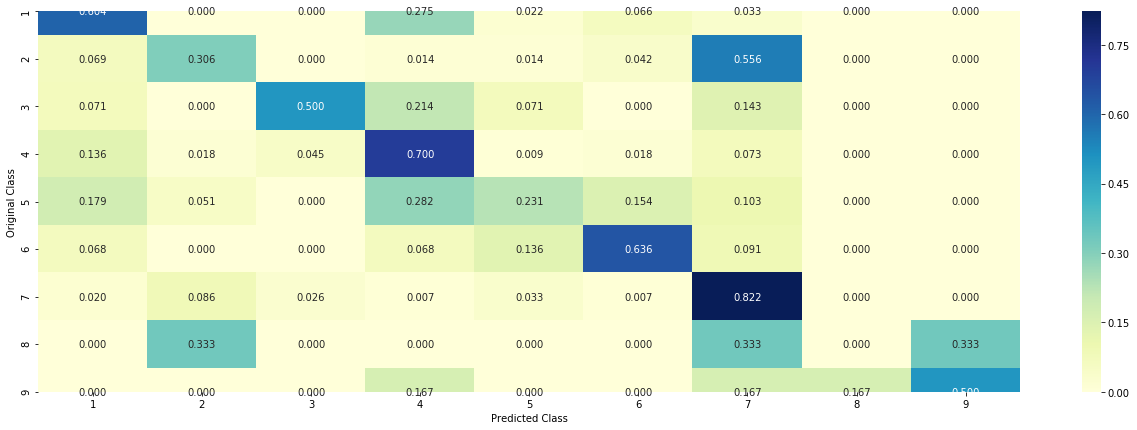

In [257]:
classifier=SGDClassifier(class_weight='balanced', alpha=0.001, penalty='l2', loss='hinge', random_state=36)
classifier.fit(x_train_onehot,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_onehot,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_onehot)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_onehot)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_onehot.toarray()))

In [226]:
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-6, 3)]
for k in alpha:
    classifier=SGDClassifier(class_weight='balanced', alpha=k, penalty='l2', loss='hinge', random_state=36)
    classifier.fit(x_train_meanEnc,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_meanEnc,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-06  ,log loss =  1.1204243601540875
If alpha =  1e-05  ,log loss =  1.0646926229343578
If alpha =  0.0001  ,log loss =  1.0620225655891475
If alpha =  0.001  ,log loss =  1.1200553910502102
If alpha =  0.01  ,log loss =  1.1319757128917483
If alpha =  0.1  ,log loss =  1.1239447704916978
If alpha =  1  ,log loss =  1.1242042953747455
If alpha =  10  ,log loss =  1.2209774333469618
If alpha =  100  ,log loss =  1.5657008330753204


train_log_loss =  0.531894474489704
cv_log_loss =  1.0629474850641174
test_log_loss =  1.1190415485414142
-------------------- Confusion matrix --------------------


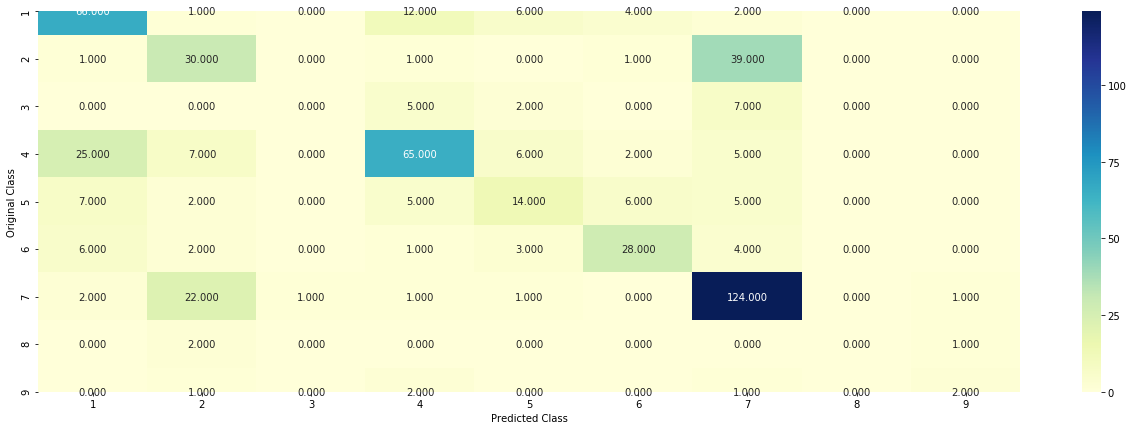

-------------------- Precision matrix (Columm Sum=1) --------------------


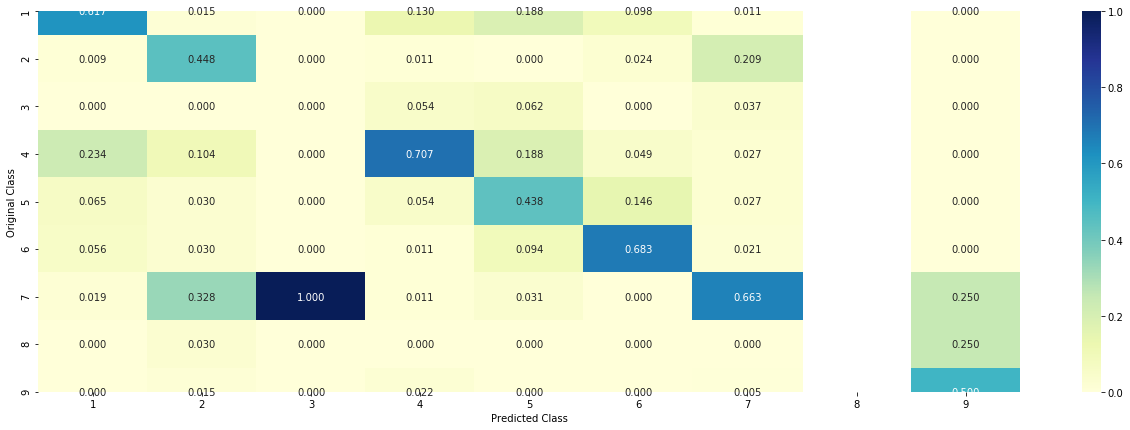

-------------------- Recall matrix (Row sum=1) --------------------


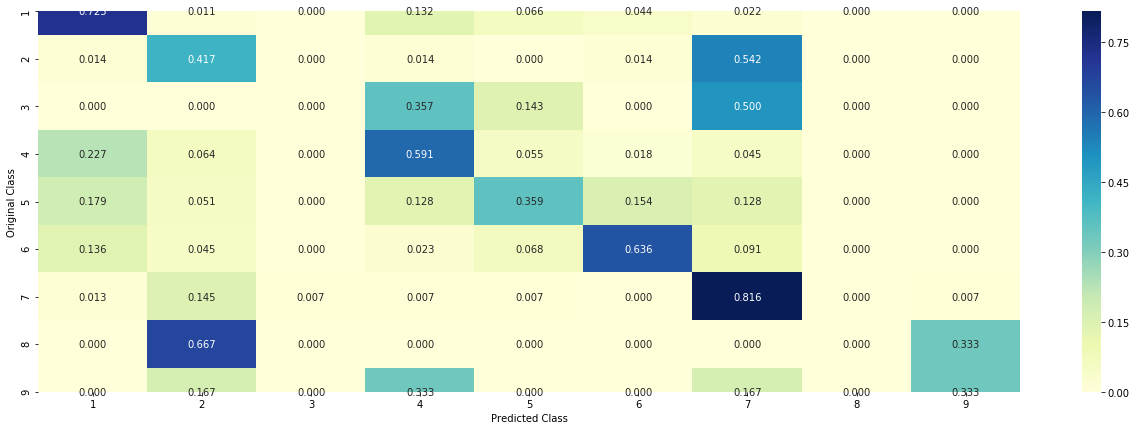

In [260]:
classifier=SGDClassifier(alpha=1e-05, penalty='l2', loss='hinge', random_state=36)
classifier.fit(x_train_meanEnc,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_meanEnc,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_meanEnc)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_meanEnc)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_meanEnc))

In [228]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000]
max_depth = [5, 10]
for j in alpha:
    for k in max_depth:
        classifier=RandomForestClassifier(n_estimators=j, criterion='gini', max_depth=k, random_state=36, n_jobs=-1)
        classifier.fit(x_train_onehot,y_train)
        sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
        sigmoid_classifier.fit(x_train_onehot,y_train)
        predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
        print('If n_estimators = ', j,"and max depth = ",k," ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If n_estimators =  100 and max depth =  5  ,log loss =  1.2557016498278994
If n_estimators =  100 and max depth =  10  ,log loss =  1.1854802997012648
If n_estimators =  200 and max depth =  5  ,log loss =  1.2441608363013759
If n_estimators =  200 and max depth =  10  ,log loss =  1.1750267439453939
If n_estimators =  500 and max depth =  5  ,log loss =  1.2376948311435607
If n_estimators =  500 and max depth =  10  ,log loss =  1.1737982000361253
If n_estimators =  1000 and max depth =  5  ,log loss =  1.234411089974103
If n_estimators =  1000 and max depth =  10  ,log loss =  1.171358042460658


train_log_loss =  0.6942094538463551
cv_log_loss =  1.1737982000361253
test_log_loss =  1.1790974219869594
-------------------- Confusion matrix --------------------


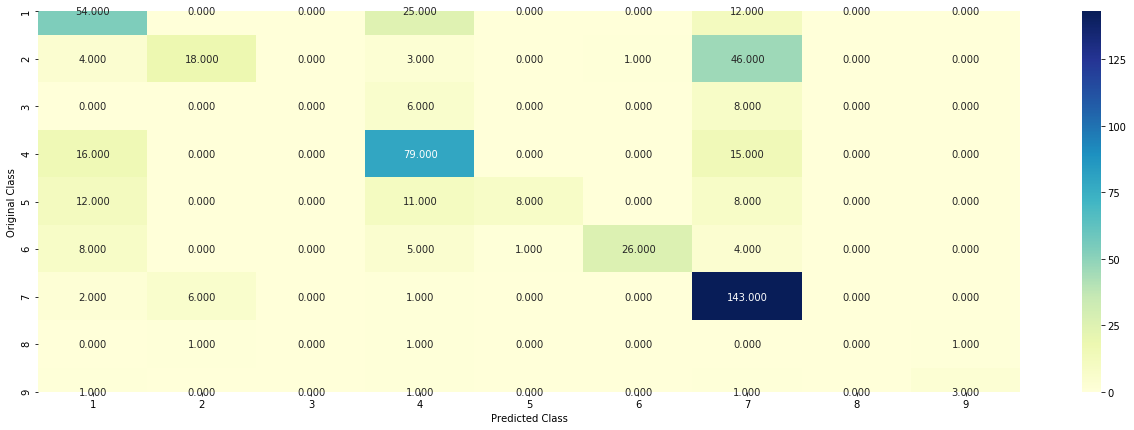

-------------------- Precision matrix (Columm Sum=1) --------------------


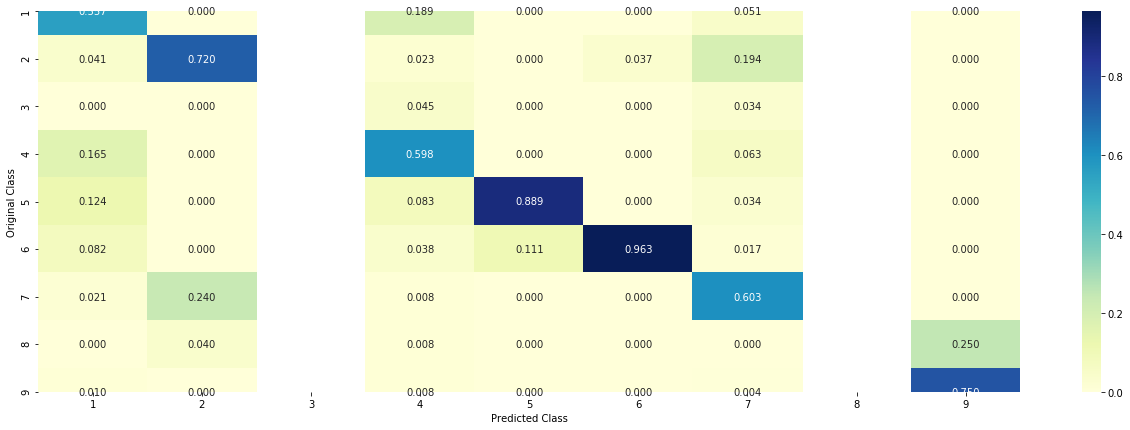

-------------------- Recall matrix (Row sum=1) --------------------


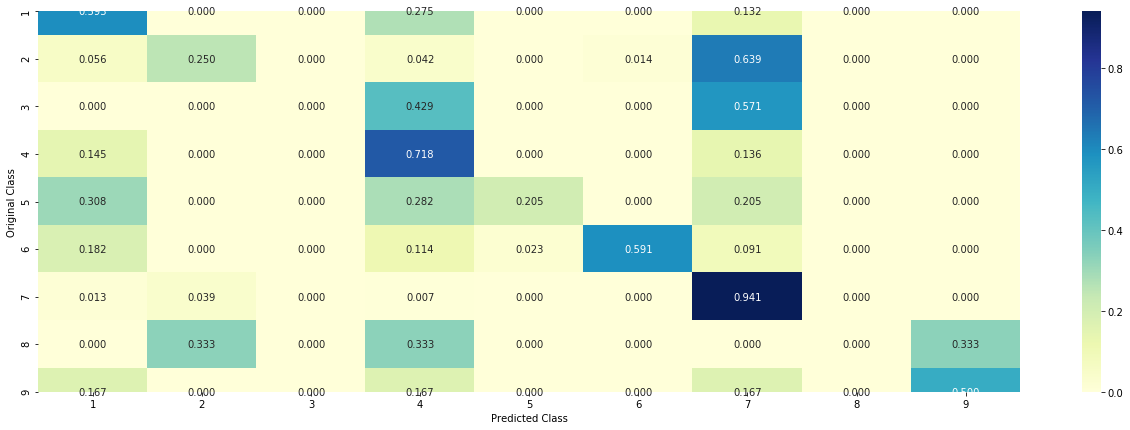

In [261]:
classifier=RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=10, random_state=36, n_jobs=-1)
classifier.fit(x_train_onehot,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_onehot,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_onehot)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_onehot)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_onehot)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_onehot.toarray()))

In [230]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
alpha = [30,60,90,150,300,900]
max_depth = [2, 5, 8, 10]
for j in alpha:
    for k in max_depth:
        classifier=RandomForestClassifier(n_estimators=j, criterion='gini', max_depth=k, random_state=36, n_jobs=-1)
        classifier.fit(x_train_meanEnc,y_train)
        sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
        sigmoid_classifier.fit(x_train_meanEnc,y_train)
        predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
        print('If n_estimators = ', j,"and max depth = ",k," ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If n_estimators =  30 and max depth =  2  ,log loss =  1.7262106761229645
If n_estimators =  30 and max depth =  5  ,log loss =  1.228837267750389
If n_estimators =  30 and max depth =  8  ,log loss =  1.479731478990728
If n_estimators =  30 and max depth =  10  ,log loss =  1.812653557876722
If n_estimators =  60 and max depth =  2  ,log loss =  1.7193117928128114
If n_estimators =  60 and max depth =  5  ,log loss =  1.4714226314163428
If n_estimators =  60 and max depth =  8  ,log loss =  1.5257003797649853
If n_estimators =  60 and max depth =  10  ,log loss =  1.8504494158514935
If n_estimators =  90 and max depth =  2  ,log loss =  1.7325632439685634
If n_estimators =  90 and max depth =  5  ,log loss =  1.4289531185849915
If n_estimators =  90 and max depth =  8  ,log loss =  1.5764798397581734
If n_estimators =  90 and max depth =  10  ,log loss =  1.8301825976475623
If n_estimators =  150 and max depth =  2  ,log loss =  1.7218499768714413
If n_estimators =  150 and max depth 

train_log_loss =  0.05961604436592253
cv_log_loss =  1.2288372677503887
test_log_loss =  1.244299823752191
-------------------- Confusion matrix --------------------


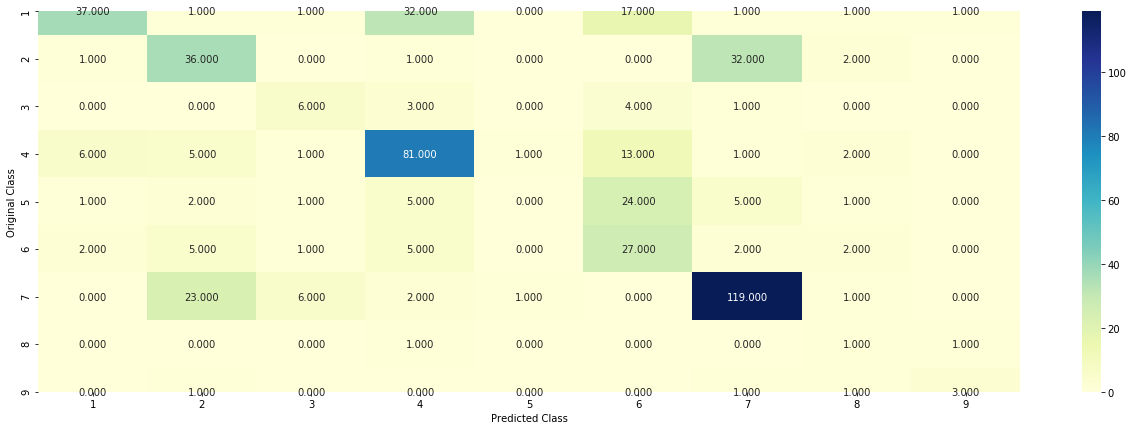

-------------------- Precision matrix (Columm Sum=1) --------------------


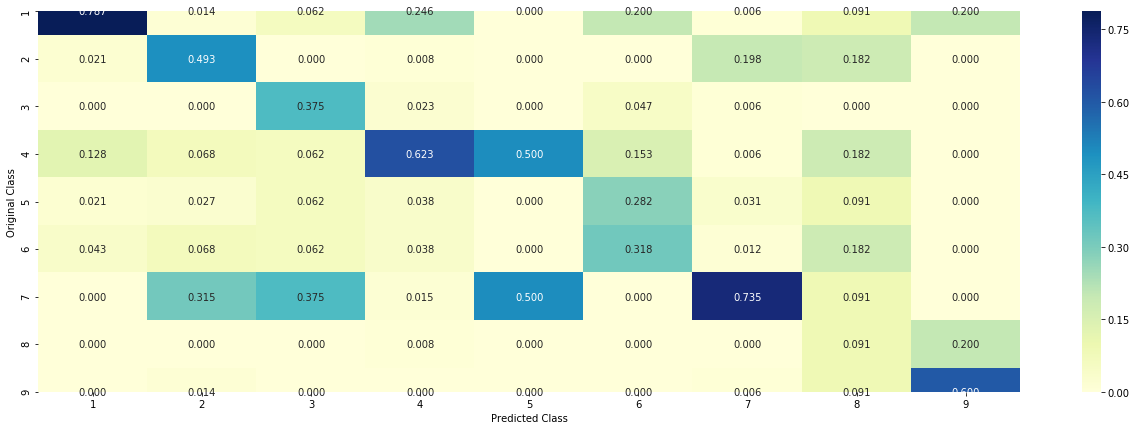

-------------------- Recall matrix (Row sum=1) --------------------


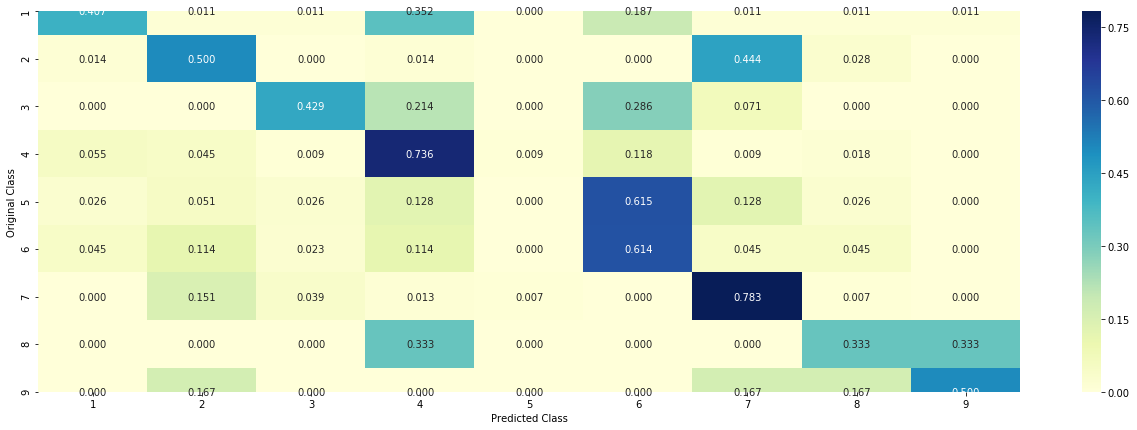

In [259]:
classifier=RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=5, random_state=36, n_jobs=-1)
classifier.fit(x_train_meanEnc,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_meanEnc,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_meanEnc)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_meanEnc)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_meanEnc)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_meanEnc))

In [262]:
temp7=np.hstack((train_text_meanEnc,train_variation_meanEnc))
temp8=np.hstack((test_text_meanEnc,test_variation_meanEnc))
temp9=np.hstack((cv_text_meanEnc,cv_variation_meanEnc))
x_train_combined=np.hstack((train_gene_onehot.toarray(),temp7))
x_cv_combined=np.hstack((cv_gene_onehot.toarray(),temp9))
x_test_combined=np.hstack((test_gene_onehot.toarray(),temp8))

In [264]:
x_train_combined.shape

(2121, 253)

In [263]:
#Logistic Regression
from sklearn.linear_model import SGDClassifier
alpha = [10 ** x for x in range(-5, 2)]
for k in alpha:
    classifier=SGDClassifier(class_weight='balanced', alpha=k, penalty='l2', loss='log', random_state=36)
    classifier.fit(x_train_combined,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_combined,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_combined)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  1e-05  ,log loss =  1.023328400414876
If alpha =  0.0001  ,log loss =  1.0574439608461577
If alpha =  0.001  ,log loss =  1.1170259304233334
If alpha =  0.01  ,log loss =  1.2409240035256628
If alpha =  0.1  ,log loss =  1.2893541096056707
If alpha =  1  ,log loss =  1.2779892232166785
If alpha =  10  ,log loss =  1.3950036293022101


train_log_loss =  0.6641968371771063
cv_log_loss =  1.023328400414876
test_log_loss =  1.087683078810552
-------------------- Confusion matrix --------------------


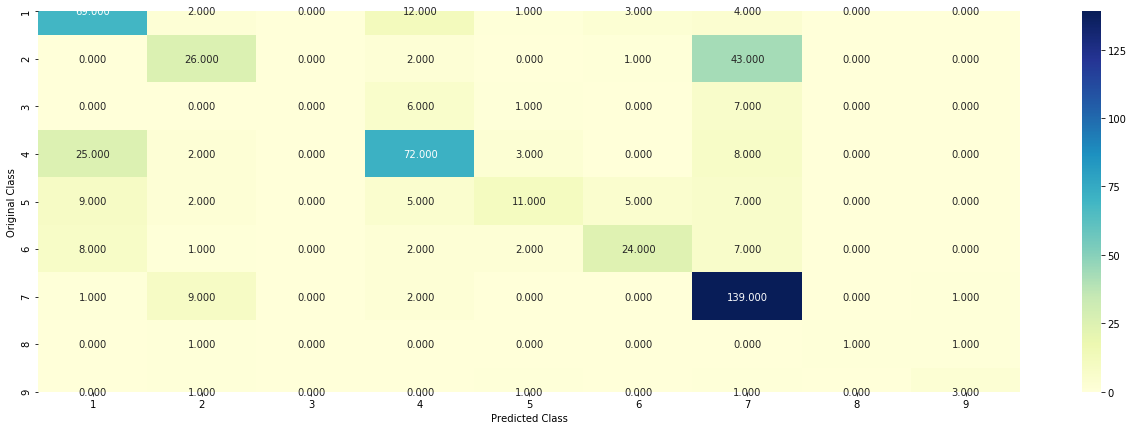

-------------------- Precision matrix (Columm Sum=1) --------------------


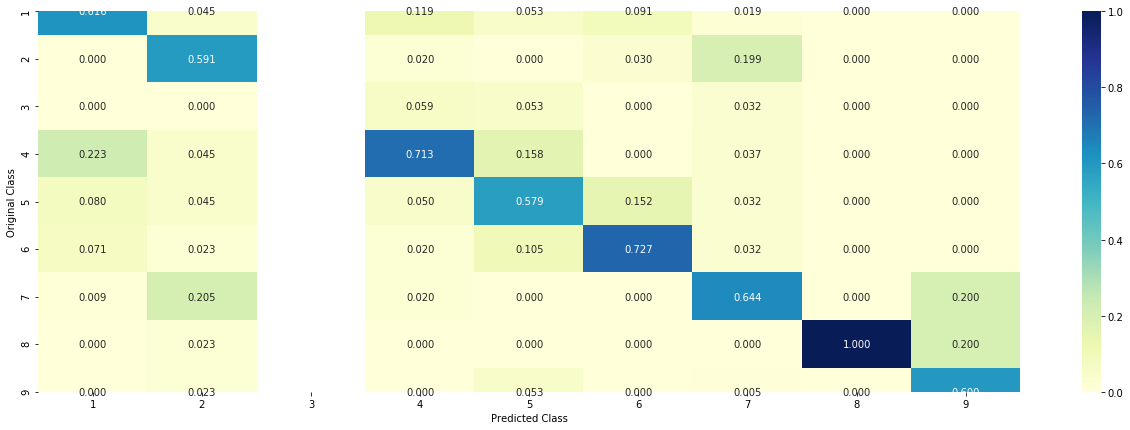

-------------------- Recall matrix (Row sum=1) --------------------


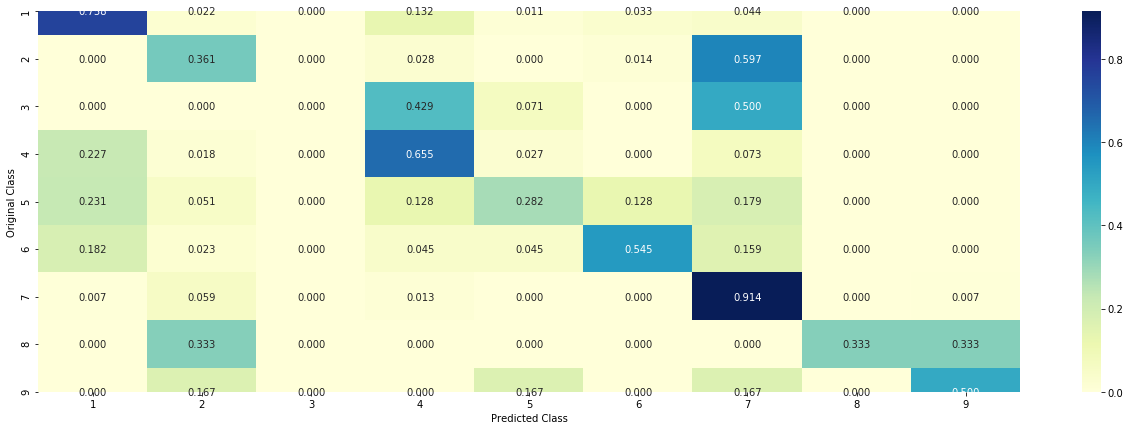

In [265]:
classifier=SGDClassifier(class_weight='balanced', alpha=1e-05, penalty='l2', loss='log', random_state=36)
classifier.fit(x_train_combined,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_combined,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_combined)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_combined)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_combined)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_combined))

In [267]:
alpha = [5, 10, 15, 20, 25, 30, 40, 50, 100]
for k in alpha:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_combined,y_train)
    sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
    sigmoid_classifier.fit(x_train_combined,y_train)
    predicted_y=sigmoid_classifier.predict_proba(x_cv_combined)
    print('If alpha = ', k, " ,log loss = ",log_loss(y_cv, predicted_y, labels=classifier.classes_))

If alpha =  5  ,log loss =  1.0799498230320603
If alpha =  10  ,log loss =  1.0642737956877735
If alpha =  15  ,log loss =  1.0696811915525124
If alpha =  20  ,log loss =  1.071866350791364
If alpha =  25  ,log loss =  1.07324643509888
If alpha =  30  ,log loss =  1.0666138173299164
If alpha =  40  ,log loss =  1.083277187434083
If alpha =  50  ,log loss =  1.0957999085350847
If alpha =  100  ,log loss =  1.1199342267683328


In [269]:
classifier=KNeighborsClassifier(n_neighbors=11)
classifier.fit(x_train_combined,y_train)
sigmoid_classifier=CalibratedClassifierCV(classifier, method="sigmoid")
sigmoid_classifier.fit(x_train_combined,y_train)
predicted_y=sigmoid_classifier.predict_proba(x_train_combined)
print("train_log_loss = ", log_loss(y_train, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_cv_combined)
print("cv_log_loss = ", log_loss(y_cv, predicted_y, labels=classifier.classes_))
predicted_y=sigmoid_classifier.predict_proba(x_test_combined)
print("test_log_loss = ", log_loss(y_test, predicted_y, labels=classifier.classes_))
#plot_confusion_matrix(y_cv, sigmoid_classifier.predict(x_cv_combined))

train_log_loss =  0.6392925664583736
cv_log_loss =  1.05441368340519
test_log_loss =  1.1020291731160454
